### Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

### importing data

In [2]:
data = pd.read_csv('CC GENERAL.csv')

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Exploratory analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
data.shape

(8950, 18)

In [6]:
data = data.drop(columns = ['CUST_ID'])        #REMOVING IRRELEVANT COLUMNS

In [7]:
def var_summary(x):
    return pd.Series([x.isnull().sum(), x.mean(), x.median(), x.quantile(0.99), x.max()], 
                  index=['MISSING VALUES','MEAN','MEDIAN','P99', 'MAX'])

num_summary=data.apply(lambda x: var_summary(x)).T
num_summary

,MISSING VALUES,MEAN,MEDIAN,P99,MAX
BALANCE,0.0,1564.474828,873.385231,9338.804814,19043.13856
BALANCE_FREQUENCY,0.0,0.877271,1.000000,1.000000,1.00000
PURCHASES,0.0,1003.204834,361.280000,8977.290000,49039.57000
ONEOFF_PURCHASES,0.0,592.437371,38.000000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,0.0,411.067645,89.000000,3886.240500,22500.00000
CASH_ADVANCE,0.0,978.871112,0.000000,9588.163357,47137.21176
PURCHASES_FREQUENCY,0.0,0.490351,0.500000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,0.0,0.202458,0.083333,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,0.0,0.364437,0.166667,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,0.0,0.135144,0.000000,0.833333,1.50000


#### replacing missing data with median

In [8]:
data.MINIMUM_PAYMENTS =data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.median())
data.CREDIT_LIMIT =data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.median())

### Outlier Treatment

In [9]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

data = data.apply(lambda x: outlier_capping(x))

### Data after missing and outlier treatment

In [10]:
def var_summary(x):
    return pd.Series([x.isnull().sum(), x.mean(), x.median(), x.quantile(0.99), x.max()], 
                  index=['MISSING VALUES','MEAN','MEDIAN','P99', 'MAX'])

num_summary=data.apply(lambda x: var_summary(x)).T
num_summary

,MISSING VALUES,MEAN,MEDIAN,P99,MAX
BALANCE,0.0,1541.046707,873.385231,9337.094398,9338.804814
BALANCE_FREQUENCY,0.0,0.878083,1.000000,1.000000,1.000000
PURCHASES,0.0,936.229237,361.280000,8961.796200,8977.290000
ONEOFF_PURCHASES,0.0,536.493774,38.000000,6684.195482,6689.898200
INSTALLMENTS_PURCHASES,0.0,384.498368,89.000000,3885.853155,3886.240500
CASH_ADVANCE,0.0,935.920972,0.000000,9584.005151,9588.163357
PURCHASES_FREQUENCY,0.0,0.490351,0.500000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.0,0.202458,0.083333,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.0,0.364437,0.166667,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,0.0,0.134017,0.000000,0.833333,0.833333


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT       

In [12]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


### Deriving Key Performance Indicators

#### 1.Monthly average purchase

In [13]:
data['Mon_av_PURCHASE'] = data.PURCHASES / data.TENURE

#### 2.Monthly cash Advance amount

In [14]:
data['Mon_cash_adv'] = data.CASH_ADVANCE / data.TENURE

#### 3.Purchase by type(on-off/installment)

In [15]:
data['Purchase_type_on_off'] = np.where(data.ONEOFF_PURCHASES>0,1,0)
data['Purchase_type_installment'] = np.where(data.INSTALLMENTS_PURCHASES>0,1,0)
data['Purchase_Type_both'] = np.where((data.Purchase_type_on_off + data.Purchase_type_installment) ==2,1,0 )

#### 4. Limit Usage

In [16]:
data['Limit_Usage'] = data.BALANCE / data.CREDIT_LIMIT


#### 5.Payment to minimum payment ratio

In [17]:
data['Ratio_payment_to_min_payment'] = data.PAYMENTS / data.MINIMUM_PAYMENTS

In [18]:
data.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Mon_av_PURCHASE,Mon_cash_adv,Purchase_type_on_off,Purchase_type_installment,Purchase_Type_both,Limit_Usage,Ratio_payment_to_min_payment
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12.0,7.950000,0.000000,0,1,0,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12.0,0.000000,536.912124,0,0,0,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12.0,64.430833,0.000000,1,0,0,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,312.343947,0.000000,12.0,124.916667,17.149001,1,0,0,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12.0,1.333333,0.000000,1,0,0,0.681429,2.771075
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,...,2407.246035,0.000000,12.0,111.106667,0.000000,0,1,0,1.005460,0.581601
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,...,198.065894,1.000000,12.0,590.917500,0.000000,1,1,1,0.046464,32.081820
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,...,532.033990,0.000000,12.0,36.350000,0.000000,0,1,0,0.792892,1.276357
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,...,311.963409,0.000000,12.0,71.790833,0.000000,1,1,1,0.144989,2.206280
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,100.302262,0.000000,12.0,106.800000,0.000000,1,0,0,0.013839,11.612605


### Standardizing data

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(data)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,...,-0.493151,-0.525551,0.36068,-0.559583,-0.510509,-1.039436,0.881992,-0.670193,-0.979687,-0.273174
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,...,0.263600,0.234227,0.36068,-0.620854,2.704783,-1.039436,-1.133797,-0.670193,0.205564,-0.113670
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,...,-0.097448,-0.525551,0.36068,-0.124282,-0.510509,0.962060,-1.133797,-0.670193,-0.149529,-0.303659
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,...,-0.352941,-0.525551,0.36068,0.341886,-0.407813,0.962060,-1.133797,-0.670193,-0.463809,-0.370128
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,...,-0.407742,-0.525551,0.36068,-0.610578,-0.510509,0.962060,-1.133797,-0.670193,0.842675,-0.184394


In [21]:
data_scaled.columns = data.columns
col_names = data_scaled.columns
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Mon_av_PURCHASE,Mon_cash_adv,Purchase_type_on_off,Purchase_type_installment,Purchase_Type_both,Limit_Usage,Ratio_payment_to_min_payment
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,...,-0.493151,-0.525551,0.36068,-0.559583,-0.510509,-1.039436,0.881992,-0.670193,-0.979687,-0.273174
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,...,0.263600,0.234227,0.36068,-0.620854,2.704783,-1.039436,-1.133797,-0.670193,0.205564,-0.113670
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,...,-0.097448,-0.525551,0.36068,-0.124282,-0.510509,0.962060,-1.133797,-0.670193,-0.149529,-0.303659
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,...,-0.352941,-0.525551,0.36068,0.341886,-0.407813,0.962060,-1.133797,-0.670193,-0.463809,-0.370128
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,...,-0.407742,-0.525551,0.36068,-0.610578,-0.510509,0.962060,-1.133797,-0.670193,0.842675,-0.184394


### Dimension Reduction

In [22]:
from sklearn.decomposition import PCA

In [23]:
data_scaled.shape

(8950, 24)

In [24]:
pc = PCA(n_components=24)

In [25]:
pc.fit(data_scaled)

#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [26]:
var1

array([ 28.71,  48.36,  57.17,  64.95,  70.5 ,  75.02,  78.9 ,  82.43,
        85.43,  88.  ,  90.08,  92.12,  93.88,  95.25,  96.49,  97.5 ,
        98.31,  98.86,  99.32,  99.71,  99.85,  99.93, 100.01, 100.03])

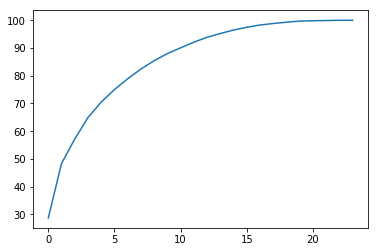

In [27]:
plt.plot(var1)

#### Since 8 factors are explaining more than 80 % variance we use 8 factors

In [28]:
pc_final=PCA(n_components=8).fit(data_scaled)

reduced_cr=pc_final.fit_transform(data_scaled)

In [29]:
pd.DataFrame(reduced_cr).head(5)

,0,1,2,3,4,5,6,7
0,-1.594557,-2.108983,-0.152197,0.147094,0.468649,-0.152216,0.051936,0.156582
1,-2.688504,3.197300,1.028896,1.446814,0.653876,-0.722389,-0.231708,-0.698709
2,0.655865,-0.203371,0.762998,-2.370575,-0.618211,-0.782982,-0.457942,-1.166112
3,-0.731784,-0.405740,1.697449,-1.605323,0.523396,-0.443317,-1.073882,-0.017986
4,-1.842256,-0.968944,0.133155,-1.983886,0.046456,0.029513,0.712782,0.144883


In [30]:
col_list=data_scaled.columns
col_list

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Mon_av_PURCHASE', 'Mon_cash_adv', 'Purchase_type_on_off',
       'Purchase_type_installment', 'Purchase_Type_both', 'Limit_Usage',
       'Ratio_payment_to_min_payment'],
      dtype='object')

### Creating Loading matrix

In [31]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=data_scaled.columns).T
Loadings.to_csv('Loadings.csv')

##### new variables

In [32]:
new_cols = ['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
             'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','PAYMENTS','MINIMUM_PAYMENTS','TENURE',
             'Mon_av_PURCHASE','Purchase_type_on_off','Purchase_type_installment','Limit_Usage','Mon_cash_adv', 'Purchase_Type_both']


### using reduced variables now

In [33]:
data_scaled = data_scaled[new_cols]

In [34]:
data_scaled.head()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,TENURE,Mon_av_PURCHASE,Purchase_type_on_off,Purchase_type_installment,Limit_Usage,Mon_cash_adv,Purchase_Type_both
0,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.642945,-0.493151,0.36068,-0.559583,-1.039436,0.881992,-0.979687,-0.510509,-0.670193
1,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,1.089747,0.263600,0.36068,-0.620854,-1.039436,-1.133797,0.205564,2.704783,-0.670193
2,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,-0.456289,-0.097448,0.36068,-0.124282,0.962060,-1.133797,-0.149529,-0.510509,-0.670193
3,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,-0.732573,-0.352941,0.36068,0.341886,0.962060,-1.133797,-0.463809,-0.407813,-0.670193
4,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.431298,-0.407742,0.36068,-0.610578,0.962060,-1.133797,0.842675,-0.510509,-0.670193


### Clustering data using K Means algorithm

In [35]:
from sklearn.cluster import KMeans

#### 3 Cluster Solution

In [36]:
km_3 = KMeans(n_clusters=3,random_state=123)
km_3.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [37]:
pd.Series(km_3.labels_).value_counts()

0    4712
2    2950
1    1288
dtype: int64

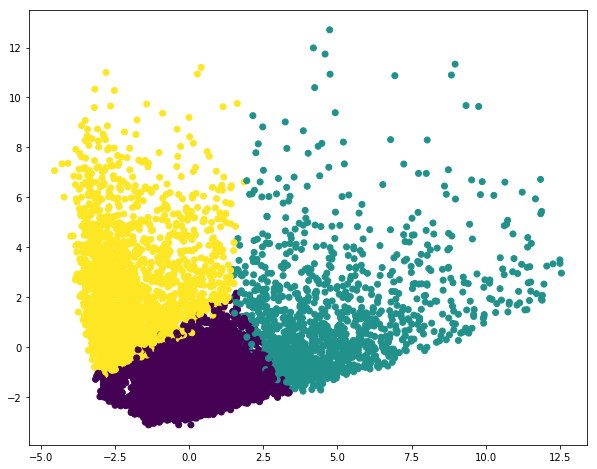

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_3.labels_.astype(float))

#### Cluster 4,5,6,7,8 Solutions

In [39]:
#3 clusters
km_3 = KMeans(n_clusters=3,random_state=123).fit(reduced_cr)

# 4 clusters
km_4=KMeans(n_clusters=4,random_state=123).fit(reduced_cr)

# 5 clusters
km_5=KMeans(n_clusters=5,random_state=123).fit(reduced_cr)

# 6 clusters
km_6=KMeans(n_clusters=6,random_state=123).fit(reduced_cr)

# 7 clusters
km_7=KMeans(n_clusters=7,random_state=123).fit(reduced_cr)

# 8 clusters
km_8=KMeans(n_clusters=8,random_state=123).fit(reduced_cr)

In [40]:
data_scaled.head(10)

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,TENURE,Mon_av_PURCHASE,Purchase_type_on_off,Purchase_type_installment,Limit_Usage,Mon_cash_adv,Purchase_Type_both
0,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.642945,-0.493151,0.36068,-0.559583,-1.039436,0.881992,-0.979687,-0.510509,-0.670193
1,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,1.089747,0.263600,0.36068,-0.620854,-1.039436,-1.133797,0.205564,2.704783,-0.670193
2,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,-0.456289,-0.097448,0.36068,-0.124282,0.962060,-1.133797,-0.149529,-0.510509,-0.670193
3,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,-0.732573,-0.352941,0.36068,0.341886,0.962060,-1.133797,-0.463809,-0.407813,-0.670193
4,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.431298,-0.407742,0.36068,-0.610578,0.962060,-1.133797,0.842675,-0.510509,-0.670193
5,0.260344,-0.489121,1.403039,-0.527079,0.439310,-0.678661,0.550784,-0.685371,-0.557505,-0.293468,-0.110752,1.346530,0.36068,0.235451,-1.039436,0.881992,1.764576,-0.510509,-0.670193
6,4.035657,5.348155,0.449374,-0.527079,1.269843,2.673451,1.599199,-0.685371,-0.557505,2.378162,2.089631,-0.445648,0.36068,3.933379,0.962060,0.881992,-0.963860,-0.510509,1.492109
7,-0.327867,-0.489121,0.076455,-0.527079,1.269843,-0.678661,1.599199,-0.685371,-0.557505,-0.102638,-0.430973,-0.174719,0.36068,-0.340702,-1.039436,0.881992,1.159800,-0.510509,-0.670193
8,-0.049006,0.113959,-0.272832,-0.527079,-0.391225,-0.399319,-0.287947,-0.685371,-0.557505,-0.436591,-0.426881,-0.353249,0.36068,-0.067558,0.962060,0.881992,-0.683545,-0.510509,1.492109
9,0.226458,0.679313,-0.568588,-0.527079,-0.806490,-0.119974,-0.916995,-0.685371,-0.557505,-0.532007,-0.215252,-0.524957,0.36068,0.202260,0.962060,-1.133797,-1.056681,-0.510509,-0.670193


### Silhouette Coefficient to find optimum cluster solution

In [ ]:
from sklearn import metrics
# calculate SC for K=3 through K=8
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

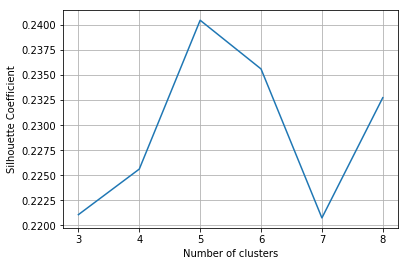

In [42]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### calinski harabaz score to find optimum solution

In [43]:
# calculate for K=2 through K=8
from sklearn.metrics import calinski_harabaz_score
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=100)
    km.fit_transform(reduced_cr)
    scores.append(calinski_harabaz_score(reduced_cr,km.labels_))

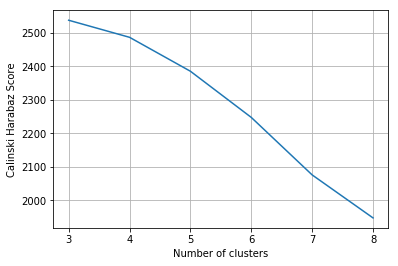

In [44]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabaz Score')
plt.grid(True)

### Elbow Analysis to find optimum solution

In [45]:
# calculate for K=2 through K=8
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit_transform(reduced_cr)
    scores.append(km.inertia_)
scores

[112955.87925063045,
 96532.17399782845,
 85659.62090527493,
 78456.95510477833,
 73989.04542951313,
 70376.66599395795]

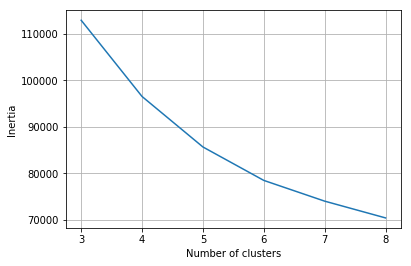

In [46]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)

### Mean value of each variable group by Cluster- 5

In [52]:
C5=pd.concat([data_scaled[new_cols],pd.Series(km_5.labels_,name='cluster_5')],axis=1)

In [53]:
# Mean value of each variable group by Cluster- 6
cluster_5_output=C5.groupby('cluster_5').apply(lambda x: x[new_cols].mean()).T
cluster_5_output

cluster_5,0,1,2,3,4
PURCHASES,-0.462265,0.254074,-0.276128,3.012542,-0.352727
ONEOFF_PURCHASES,-0.282353,0.232587,-0.487595,2.729737,-0.264658
INSTALLMENTS_PURCHASES,-0.561976,0.218523,0.191511,2.044060,-0.343549
CASH_ADVANCE,-0.129964,-0.357770,-0.452512,-0.152517,2.103023
PURCHASES_FREQUENCY,-0.937849,0.734976,0.590229,1.112952,-0.582133
ONEOFF_PURCHASES_FREQUENCY,-0.325475,0.741351,-0.674580,1.721481,-0.283378
PURCHASES_INSTALLMENTS_FREQUENCY,-0.897221,0.477258,0.818182,0.968225,-0.515074
CASH_ADVANCE_FREQUENCY,0.071390,-0.345002,-0.560481,-0.274067,1.763687
CASH_ADVANCE_TRX,-0.060997,-0.313168,-0.477069,-0.168803,1.863096
PURCHASES_TRX,-0.575592,0.415736,-0.105496,2.474447,-0.389362


### Profiling  

In [47]:
# Conactenating labels found through Kmeans with data 
data_scaled['cluster_3'] = km_3.labels_
data_scaled['cluster_4'] = km_4.labels_
data_scaled['cluster_5'] = km_5.labels_
data_scaled['cluster_6'] = km_6.labels_
data_scaled['cluster_7'] = km_7.labels_
data_scaled['cluster_8'] = km_8.labels_

In [48]:
size=pd.concat([pd.Series(data_scaled.cluster_3.size), pd.Series.sort_index(data_scaled.cluster_3.value_counts()), pd.Series.sort_index(data_scaled.cluster_4.value_counts()),
           pd.Series.sort_index(data_scaled.cluster_5.value_counts()), pd.Series.sort_index(data_scaled.cluster_6.value_counts()),
           pd.Series.sort_index(data_scaled.cluster_7.value_counts()), pd.Series.sort_index(data_scaled.cluster_8.value_counts())])

In [49]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size*100/data_scaled.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,100.0,52.648045,14.391061,32.960894,37.675978,10.268156,39.441341,12.614525,34.268156,24.77095,...,25.195531,3.083799,3.061453,21.541899,9.318436,11.139665,19.106145,8.681564,16.670391,10.480447


In [50]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([data_scaled.apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_3').apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_4').apply(lambda x: x.mean()).T,
          data_scaled.groupby('cluster_5').apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_6').apply(lambda x: x.mean()).T,
          data_scaled.groupby('cluster_7').apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [51]:
Profling_output_final.to_csv('Profiling_output5.csv')

### Based on Silhoutee coeficcient and Profiling we choose 5 cluster Solution

#### Cluster plot

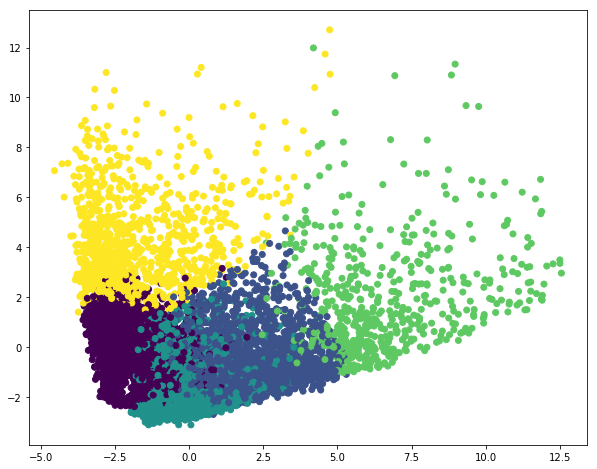

In [54]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_5.labels_.astype(float))